In [1]:
!unzip /content/cubic_zirconia.csv.zip


Archive:  /content/cubic_zirconia.csv.zip
  inflating: cubic_zirconia.csv      


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('cubic_zirconia.csv')

In [4]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [9]:
df['cut'].value_counts()

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

In [10]:
df['color'].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [11]:
df['clarity'].value_counts()

clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64

In [12]:
df['depth'].isnull().value_counts()

depth
False    26270
True       697
Name: count, dtype: int64

In [13]:
df['depth'].mean()

61.74514655500572

In [14]:
df['depth'].describe()

count    26270.000000
mean        61.745147
std          1.412860
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

In [15]:
df['depth'].mean() + 3*df['depth'].std()

65.98372726943354

In [16]:
df[df['depth']>66].value_counts().sum()

178

In [17]:
df['depth'].fillna(df['depth'].median(),inplace=True)

In [18]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [19]:
df2=df.copy()

In [20]:
df2=df.drop(['cut','color','clarity'],axis=1)

In [21]:
df2.head()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779


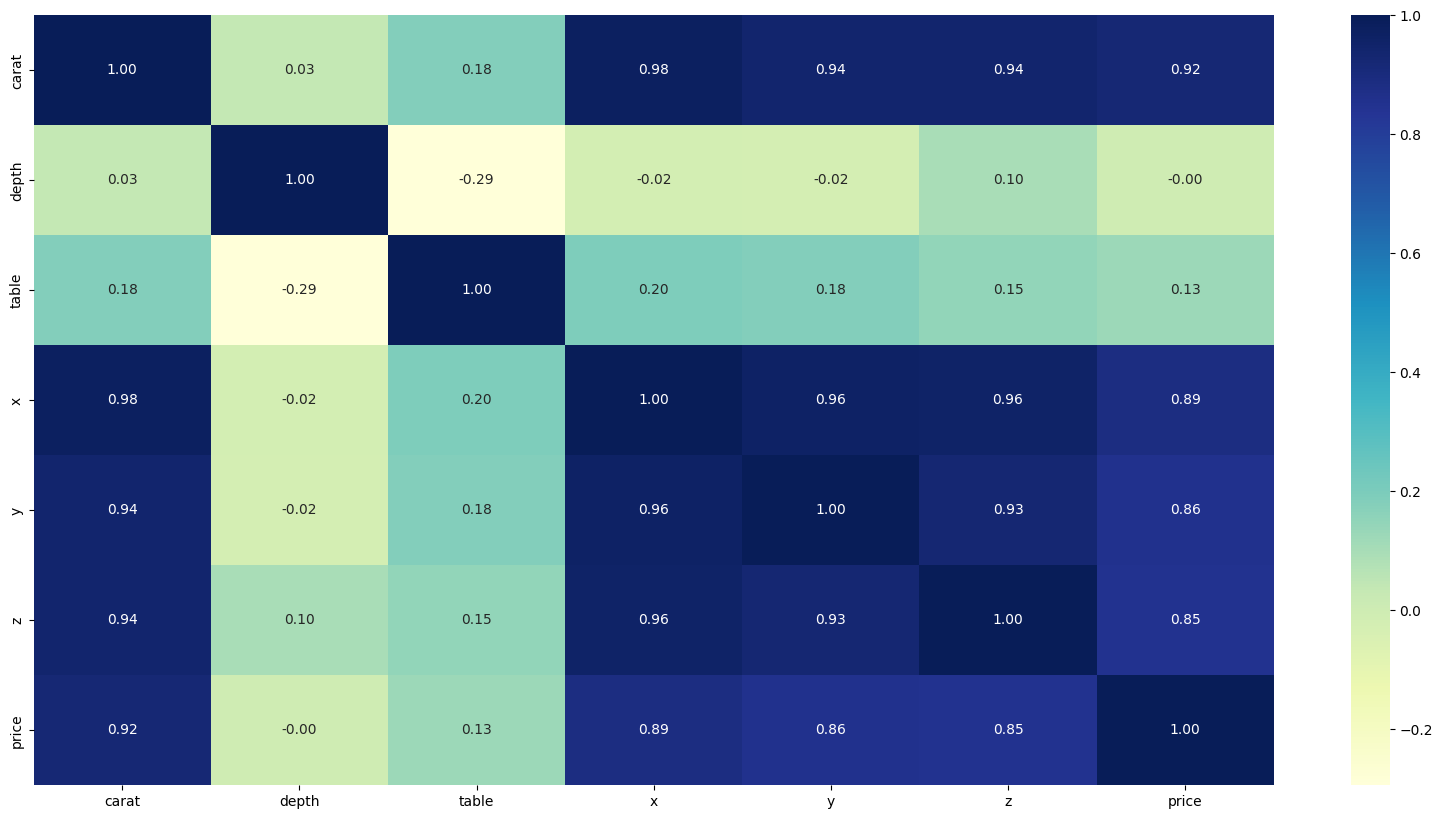

In [22]:
corr = df2.corr()
plt.figure(figsize=(20,10))
a = sns.heatmap(corr, annot=True, fmt='.2f', cmap="YlGnBu")

In [23]:
df2.duplicated().sum()

51

In [24]:
df2.drop_duplicates(inplace=True)

In [25]:
# define numerical & categorical columns
numeric_features = [feature for feature in df2.columns if df2[feature].dtype != 'O']
categorical_features = [feature for feature in df2.columns if df2[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

We have 0 categorical features : []


In [26]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

We have 3 categorical features : ['cut', 'color', 'clarity']


<ipython-input-27-6a3ccb104909>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-27-6a3ccb104909>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


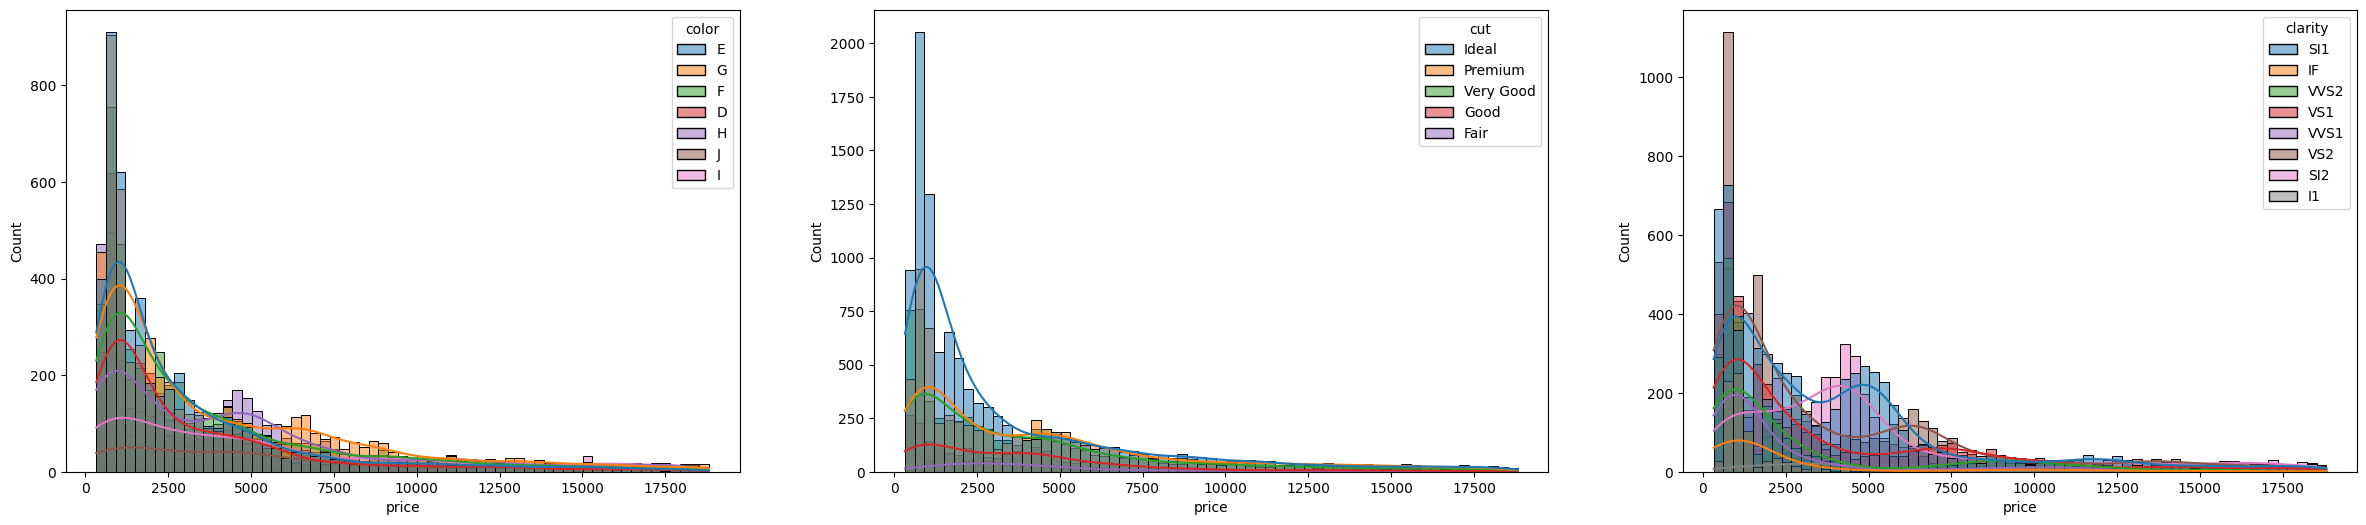

In [27]:
plt.subplots(1,2,figsize=(40,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='price',kde=True,hue='color')
plt.subplot(142)
ax =sns.histplot(data=df,x='price',kde=True,hue='cut')
plt.subplot(143)
ax =sns.histplot(data=df,x='price',kde=True,hue='clarity')
plt.show()

<Axes: title={'center': 'Price'}, ylabel='price'>

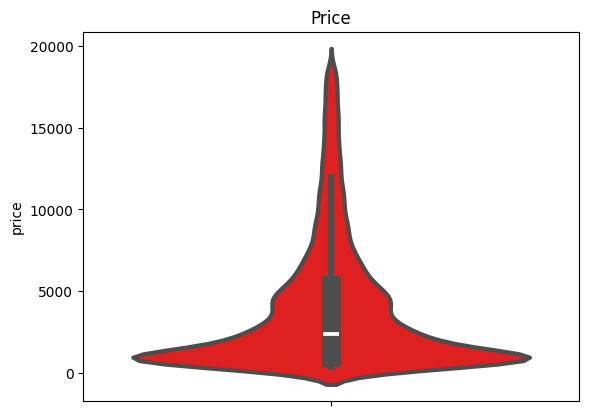

In [28]:
plt.title('Price')
sns.violinplot(y='price',data=df,color='red',linewidth=3)

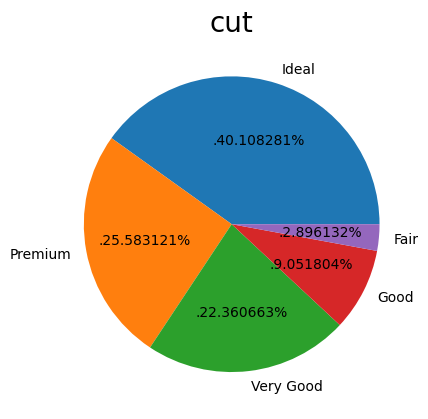

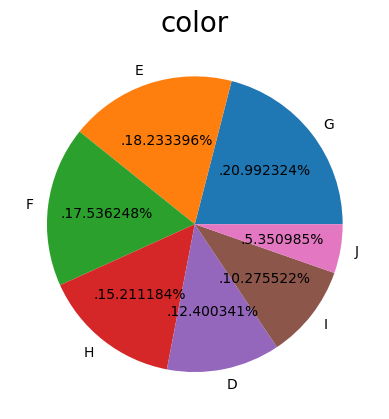

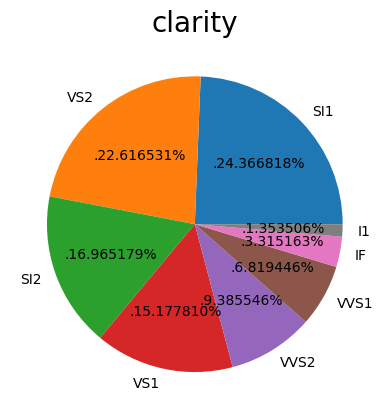

In [29]:
for feature in categorical_features:
    size=df[feature].value_counts().values
    labels=df[feature].value_counts().index
    label_list=[]
    for i in labels:
      label_list.append(i)
    # print(label_list)
    # plt.figure(figsize=(10,5)
    plt.pie(size,labels = label_list,autopct = '.%2f%%')
    plt.title(f"{feature}", fontsize = 20)
    plt.show()

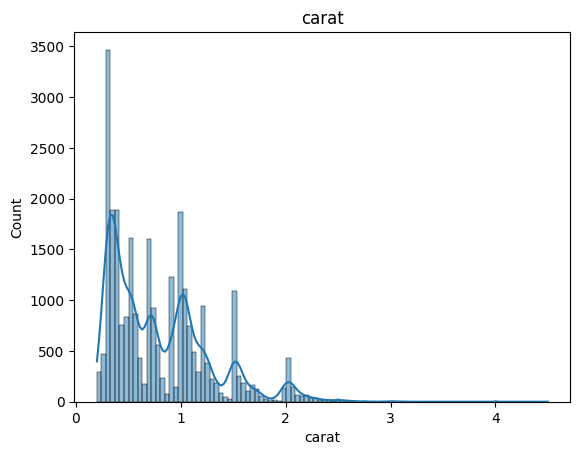

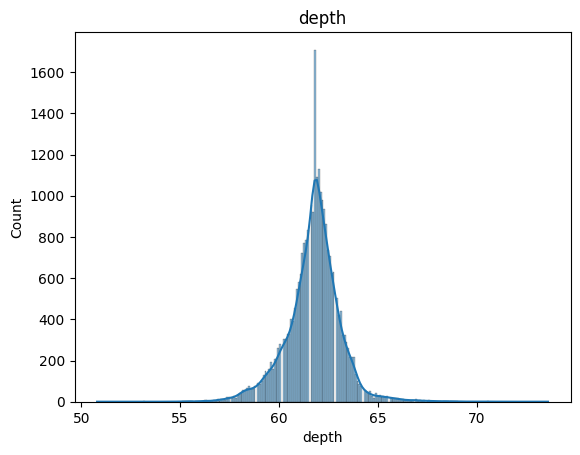

In [30]:
feature=numeric_features
sns.histplot(df[feature[0]], kde=True)
plt.title(feature[0])
plt.show()
sns.histplot(df[feature[1]], kde=True)
plt.title(feature[1])
plt.show()



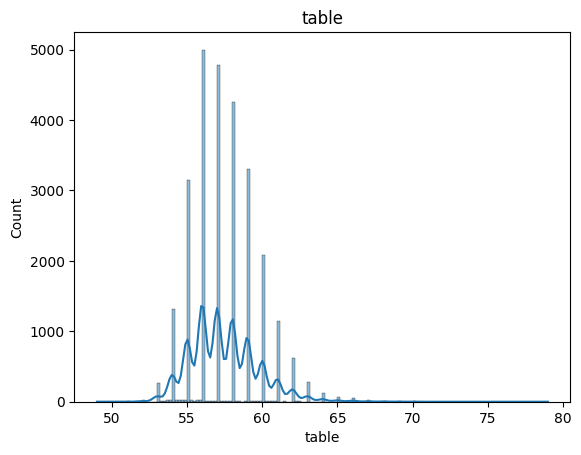

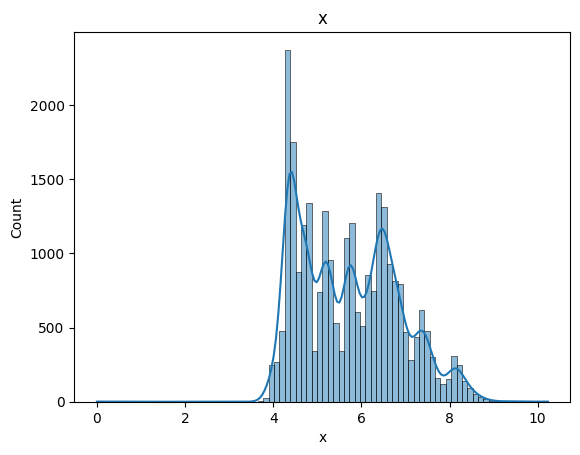

In [31]:
sns.histplot(df[feature[2]], kde=True)
plt.title(feature[2])
plt.show()
sns.histplot(df[feature[3]], kde=True)
plt.title(feature[3])
plt.show()



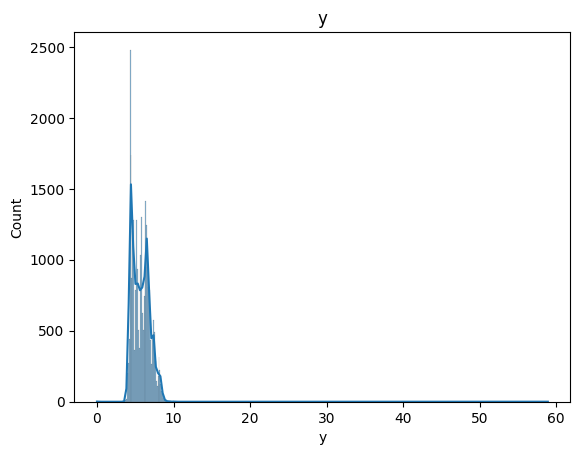

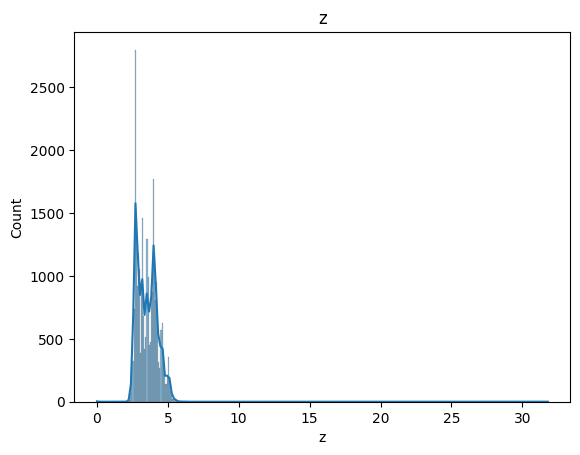

In [32]:
sns.histplot(df[feature[4]], kde=True)
plt.title(feature[4])
plt.show()
sns.histplot(df[feature[5]], kde=True)
plt.title(feature[5])
plt.show()



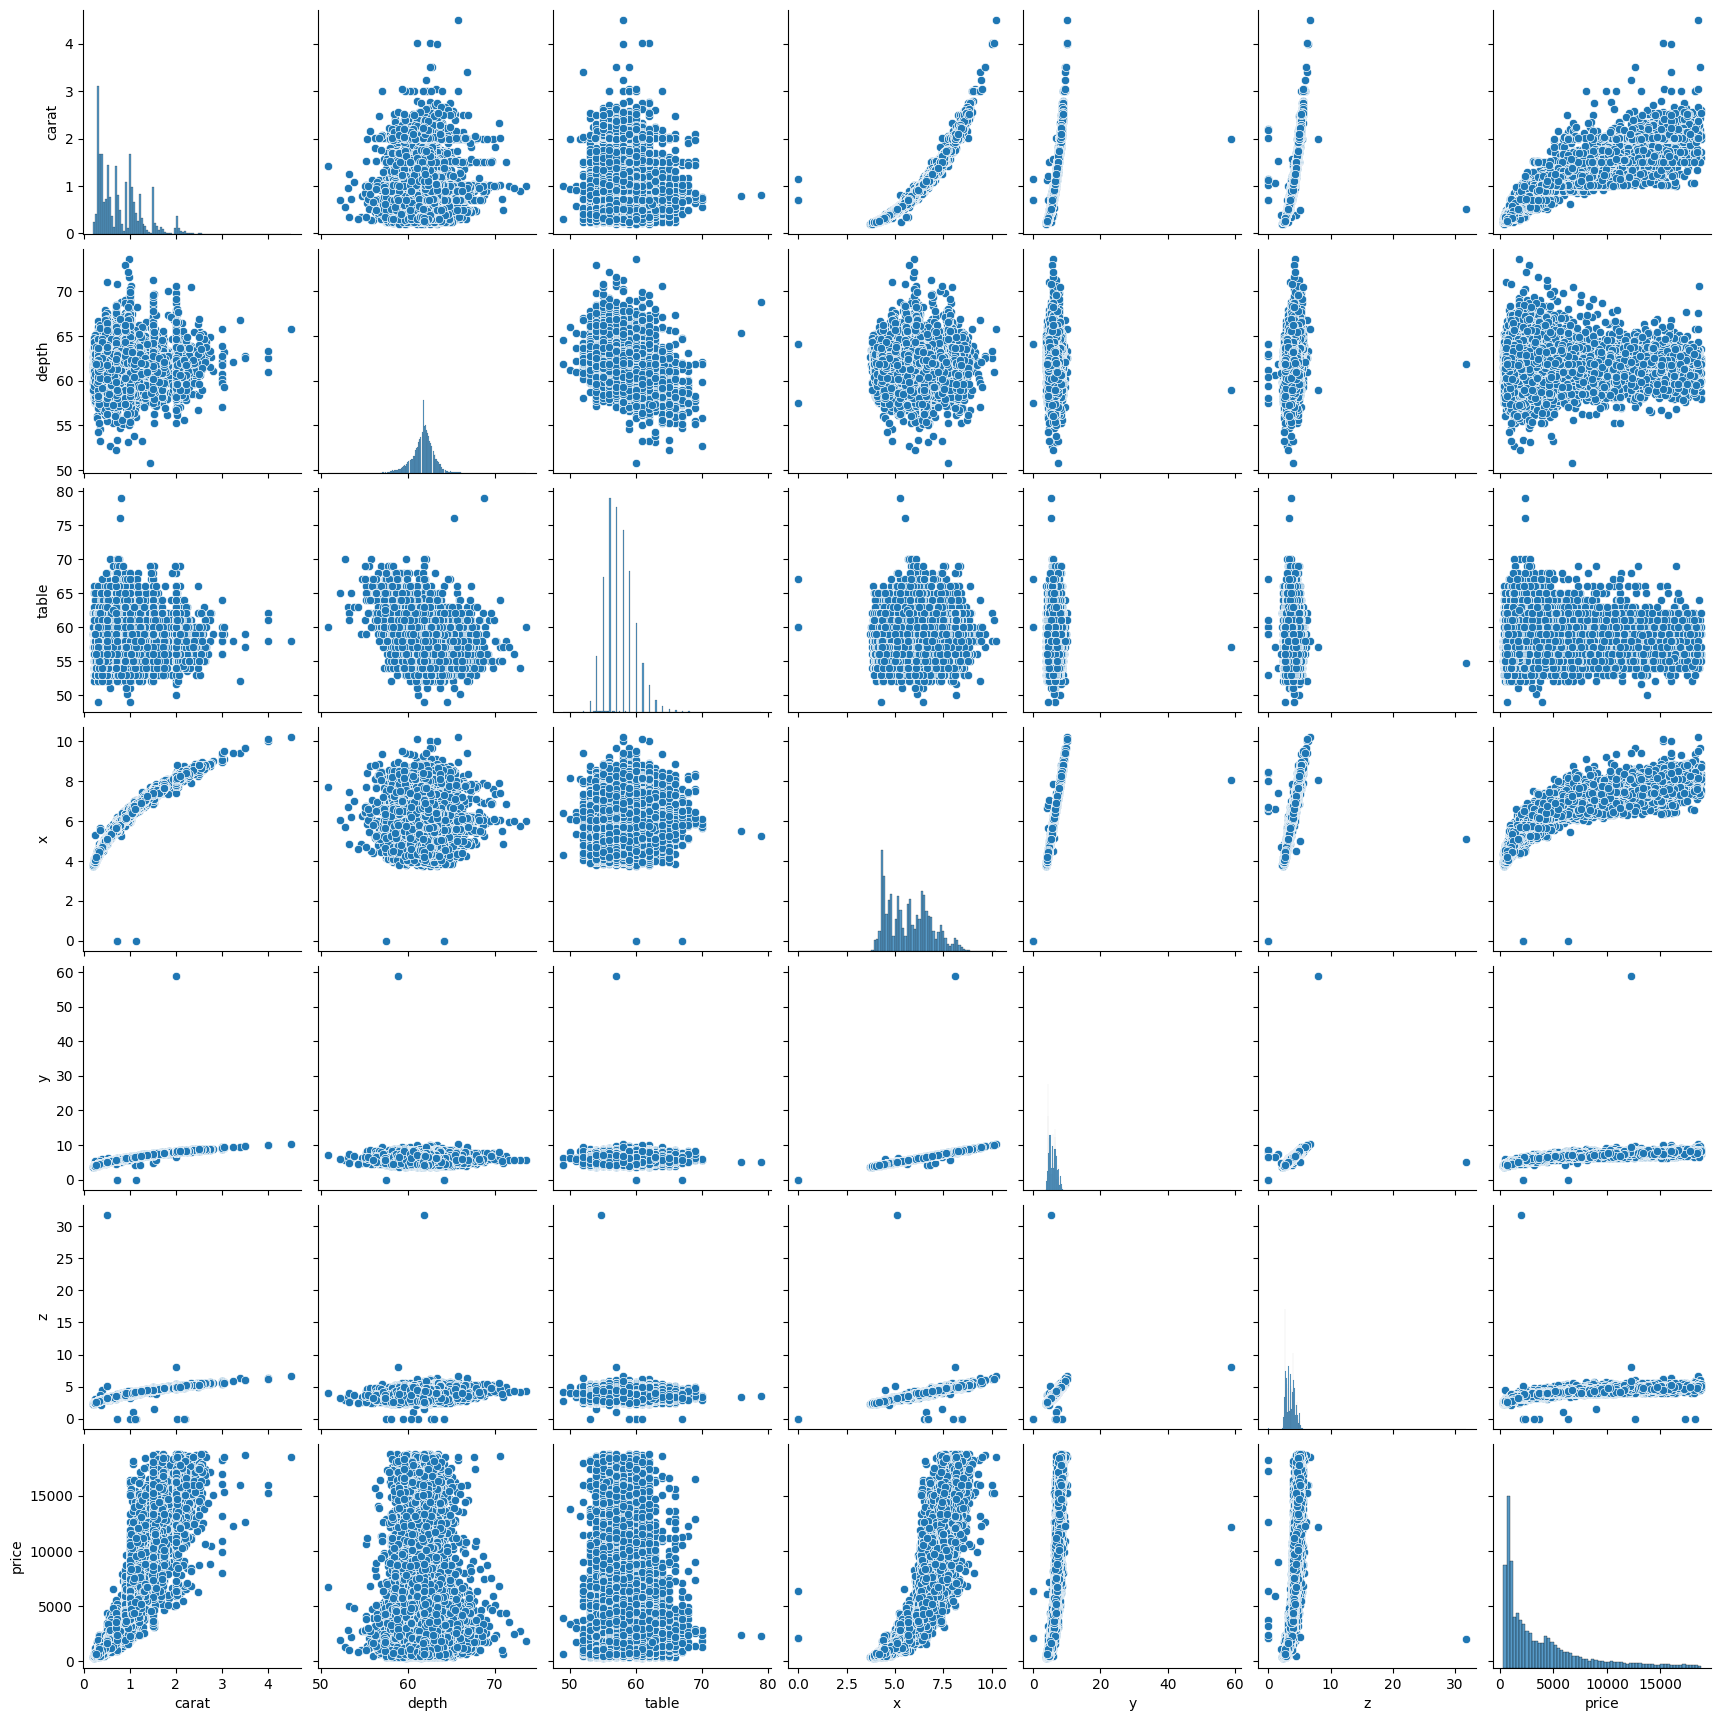

In [33]:
sns.pairplot(df)
plt.show()

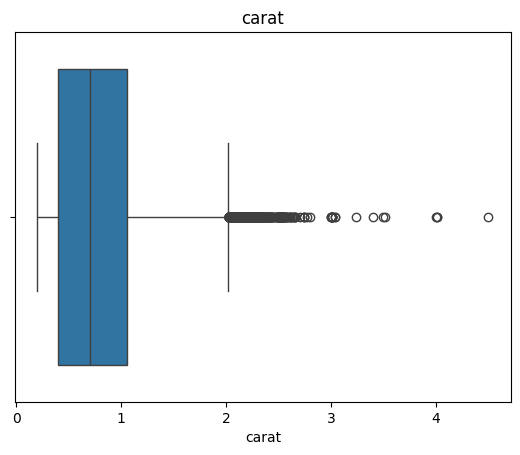

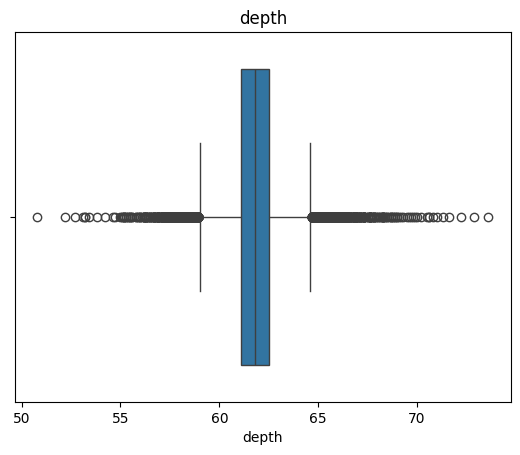

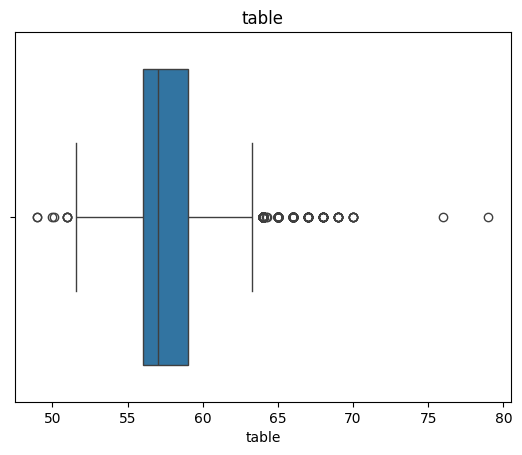

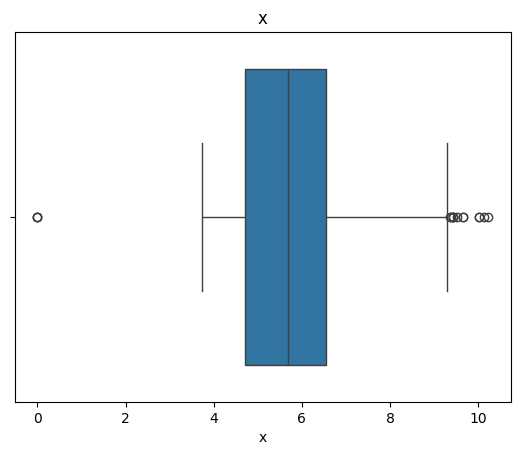

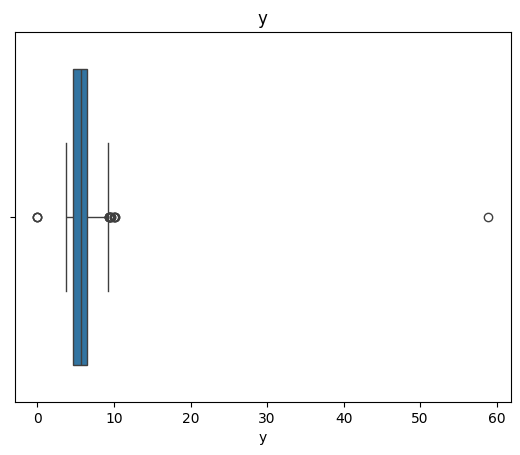

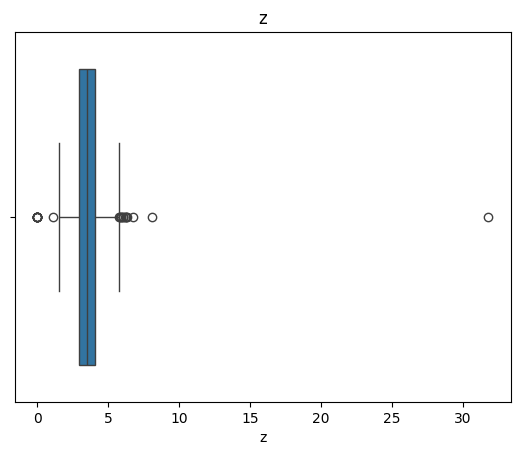

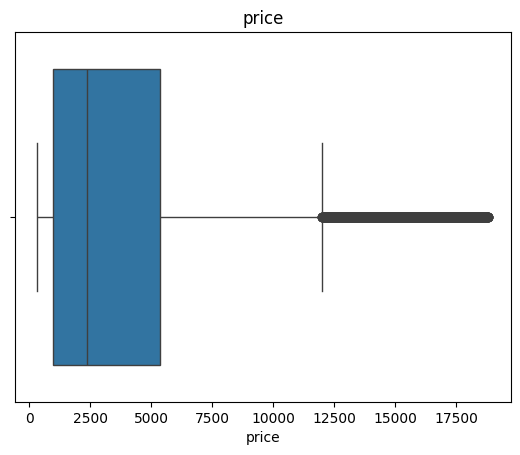

In [34]:
for feature in numeric_features:
  sns.boxplot(x=df[feature])
  plt.title(feature)
  plt.show()

In [35]:
out=np.percentile(df['price'],[15,85])

In [36]:
low,high=out[0],out[1]

In [37]:
df3=df.drop(df[(df['price']<low)|(df['price']>high)].index,inplace=False)

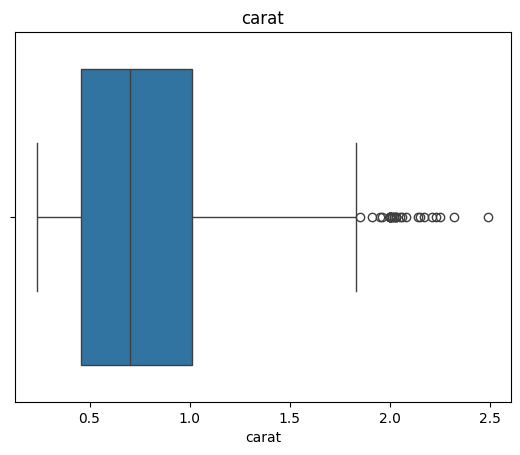

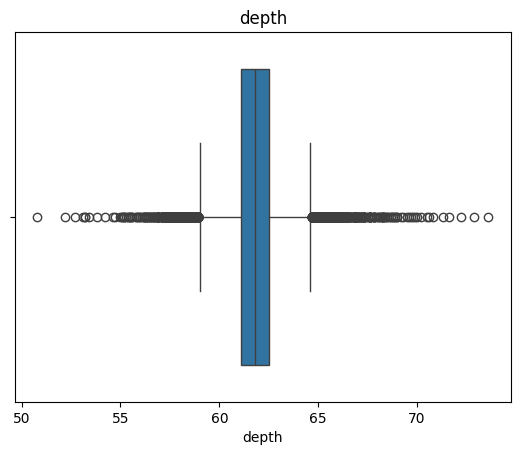

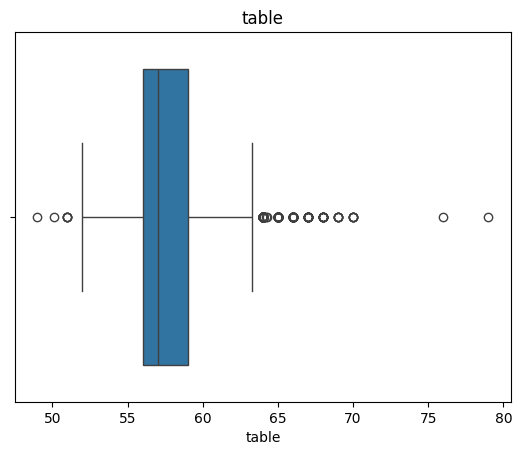

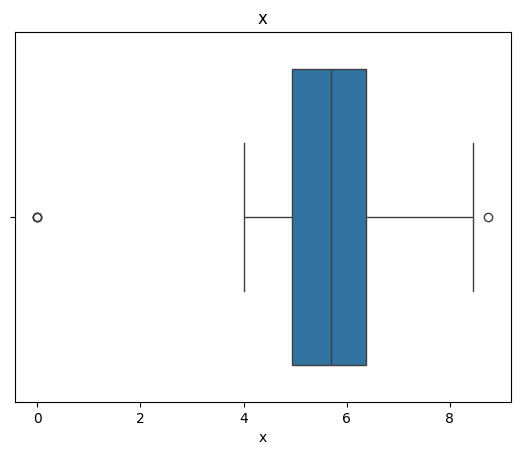

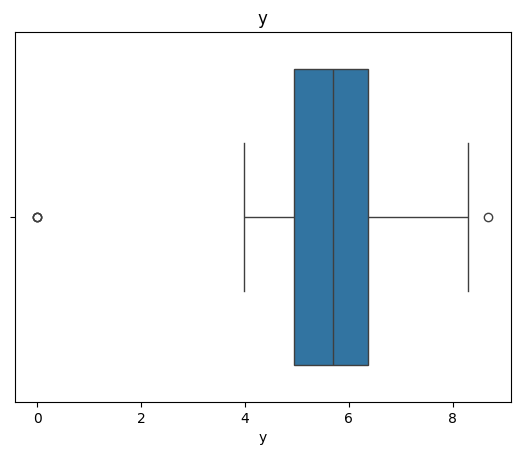

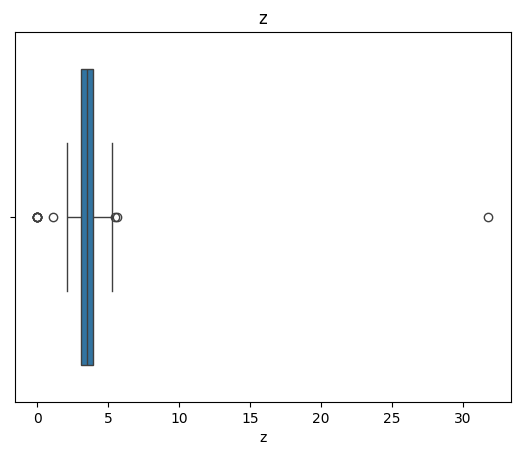

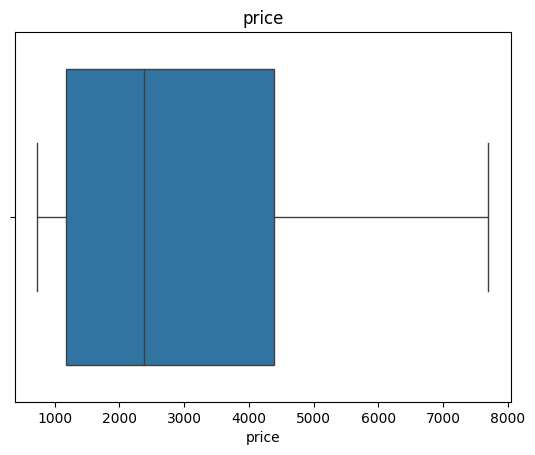

In [38]:
for feature in numeric_features:
  sns.boxplot(x=df3[feature])
  plt.title(feature)
  plt.show()

In [39]:
df3

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
...,...,...,...,...,...,...,...,...,...,...
26961,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656


In [40]:
df3.reset_index(drop=True, inplace=True)
df3


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
1,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
2,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
3,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
4,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
...,...,...,...,...,...,...,...,...,...,...
18873,0.25,Premium,F,VVS2,62.0,59.0,4.04,3.99,2.49,740
18874,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
18875,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
18876,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656


In [41]:
numeric_features.remove('price')

In [42]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

# Numerical Pipeline
num_pipeline = Pipeline(
                steps = [
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())
                ]
            )

# Categorical Pipeline
cat_pipeline = Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('ordinal_encoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
                ('scaler',StandardScaler())
                ]
            )

preprocessor = ColumnTransformer(
                [
                ('num_pipeline',num_pipeline,numeric_features),
                ('cat_pipeline',cat_pipeline,categorical_features)
                ]
            )

In [43]:
X,Y=df3.drop('price',axis=1),df3['price']

In [44]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [45]:
xtrain

,carat,cut,color,clarity,depth,table,x,y,z
12995,0.50,Premium,H,SI1,59.0,59.0,5.22,5.18,3.07
4413,0.90,Good,G,VS2,63.6,59.0,6.10,6.04,3.86
9358,1.35,Fair,J,SI1,61.8,56.0,6.90,7.02,4.54
6916,0.53,Ideal,G,VVS1,61.8,56.0,5.19,5.24,3.22
15598,1.12,Premium,I,SI1,60.8,57.0,6.76,6.70,4.09
...,...,...,...,...,...,...,...,...,...
11284,1.01,Premium,H,VS2,58.1,60.0,6.61,6.55,3.82
11964,0.51,Ideal,E,SI1,60.8,57.0,5.17,5.22,3.16
5390,0.77,Very Good,F,VVS2,60.6,60.0,5.89,5.92,3.58
860,1.03,Premium,D,SI2,61.7,58.0,6.47,6.50,4.00


In [46]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.5 MB/s eta 0:00:00


In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [48]:
xtrain = pd.DataFrame(preprocessor.fit_transform(xtrain),columns=preprocessor.get_feature_names_out())
xtest = pd.DataFrame(preprocessor.transform(xtest),columns=preprocessor.get_feature_names_out())

In [49]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
params={
    "Linear Regression":{},
    "Lasso":{},
    "Ridge":{},
    "K-Neighbors Regressor":{},
    "Decision Tree": {
        'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    },
    "Random Forest Regressor":{
        'n_estimators': [8,16,32,64,128,256]
    },
    "XGBRegressor":{
        'learning_rate':[.1,.01,.05,.001],
        'n_estimators': [8,16,32,64,128,256]
    },
    "CatBoosting Regressor":{
              'depth': [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [300,400,500,600]},

    "AdaBoost Regressor":{
        'learning_rate':[.1,.01,0.5,.001],
        'loss':['linear','square','exponential'],
        'n_estimators': [8,16,32,64,128,256]
    },
    "Gradient Boosting":{
        'learning_rate':[.1,.01,.05,.001],
        'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
        'n_estimators': [8,16,32,64,128,256]
    },

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    para=params[list(models.keys())[i]]
    gs = GridSearchCV(model,para,cv=3)
    gs.fit(xtrain,ytrain)

    model.set_params(**gs.best_params_)

    model.fit(xtrain, ytrain)
    y_train_pred = model.predict(xtrain)
    y_test_pred= model.predict(xtest)
    model_mse_train= mean_squared_error(ytrain, y_train_pred)
    model_mae_train= mean_absolute_error(ytrain, y_train_pred)
    rmse_train = np.sqrt(model_mse_train)
    r2_train = r2_score(ytrain, y_train_pred)


    model_mse_test= mean_squared_error(ytest, y_test_pred)
    model_mae_test= mean_absolute_error(ytest, y_test_pred)
    rmse_test = np.sqrt(model_mse_test)
    r2_test = r2_score(ytest, y_test_pred)

    model_list.append(list(models.keys())[i])
    r2_list.append(r2_test)
    model_name= list(models.keys())[i]
    print(f'Model Performance for Testing set {model_name}')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(model_mae_test))
    print("- R2 Score: {:.4f}".format(r2_test))
    print('='*35)
    print('Model Performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(model_mae_train))
    print("- R2 Score: {:.4f}".format(r2_train))


    print('\n')




Model Performance for Testing set Linear Regression
- Root Mean Squared Error: 607.3550
- Mean Absolute Error: 421.9910
- R2 Score: 0.8992
Model Performance for Training set
- Root Mean Squared Error: 589.9123
- Mean Absolute Error: 413.5849
- R2 Score: 0.9060


Model Performance for Testing set Lasso
- Root Mean Squared Error: 606.0599
- Mean Absolute Error: 421.5457
- R2 Score: 0.8996
Model Performance for Training set
- Root Mean Squared Error: 590.4291
- Mean Absolute Error: 413.4622
- R2 Score: 0.9058


Model Performance for Testing set Ridge
- Root Mean Squared Error: 607.2309
- Mean Absolute Error: 421.9926
- R2 Score: 0.8992
Model Performance for Training set
- Root Mean Squared Error: 589.9137
- Mean Absolute Error: 413.6017
- R2 Score: 0.9060


Model Performance for Testing set K-Neighbors Regressor
- Root Mean Squared Error: 403.1695
- Mean Absolute Error: 262.2409
- R2 Score: 0.9556
Model Performance for Training set
- Root Mean Squared Error: 336.3324
- Mean Absolute Error

In [50]:
report_smaller_data={}
for i in range(len(model_list)):
    report_smaller_data[model_list[i]]=r2_list[i]
    print(f'{model_list[i]} : {r2_list[i]}')
    print('\n')
best_model_name = max(report_smaller_data, key=report_smaller_data.get)
print(f'Best Model is {best_model_name}')
print(f'R2 Score is {report_smaller_data[best_model_name]}')

Linear Regression : 0.8991821068663024


Lasso : 0.8996116063043531


Ridge : 0.8992233070524845


K-Neighbors Regressor : 0.955574960150351


Decision Tree : 0.9477245892397991


Random Forest Regressor : 0.9744306974688628


XGBRegressor : 0.9765645947690067


CatBoosting Regressor : 0.9768524560697622


AdaBoost Regressor : 0.9201470219835997


Best Model is CatBoosting Regressor
R2 Score is 0.9768524560697622


In [51]:
X,Y=df.drop('price',axis=1),df['price']

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)


In [53]:
xtrain = pd.DataFrame(preprocessor.fit_transform(xtrain),columns=preprocessor.get_feature_names_out())
xtest = pd.DataFrame(preprocessor.transform(xtest),columns=preprocessor.get_feature_names_out())



In [54]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
params={
    "Linear Regression":{},
    "Lasso":{},
    "Ridge":{},
    "K-Neighbors Regressor":{},
    "Decision Tree": {
        'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    },
    "Random Forest Regressor":{
        'n_estimators': [8,16,32,64,128,256]
    },
    "XGBRegressor":{
        'learning_rate':[.1,.01,.05,.001],
        'n_estimators': [8,16,32,64,128,256]
    },
    "CatBoosting Regressor":{
              'depth': [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [300,400,500,600]},

    "AdaBoost Regressor":{
        'learning_rate':[.1,.01,0.5,.001],
        'loss':['linear','square','exponential'],
        'n_estimators': [8,16,32,64,128,256]
    },
    "Gradient Boosting":{
        'learning_rate':[.1,.01,.05,.001],
        'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
        'n_estimators': [8,16,32,64,128,256]
    },

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    para=params[list(models.keys())[i]]
    gs = GridSearchCV(model,para,cv=3)
    gs.fit(xtrain,ytrain)

    model.set_params(**gs.best_params_)

    model.fit(xtrain, ytrain)
    y_train_pred = model.predict(xtrain)
    y_test_pred= model.predict(xtest)
    model_mse_train= mean_squared_error(ytrain, y_train_pred)
    model_mae_train= mean_absolute_error(ytrain, y_train_pred)
    rmse_train = np.sqrt(model_mse_train)
    r2_train = r2_score(ytrain, y_train_pred)


    model_mse_test= mean_squared_error(ytest, y_test_pred)
    model_mae_test= mean_absolute_error(ytest, y_test_pred)
    rmse_test = np.sqrt(model_mse_test)
    r2_test = r2_score(ytest, y_test_pred)

    model_list.append(list(models.keys())[i])
    r2_list.append(r2_test)
    model_name= list(models.keys())[i]
    print(f'Model Performance for Testing set {model_name}')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(model_mae_test))
    print("- R2 Score: {:.4f}".format(r2_test))
    print('='*35)
    print('Model Performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(model_mae_train))
    print("- R2 Score: {:.4f}".format(r2_train))


    print('\n')






Model Performance for Testing set Linear Regression
- Root Mean Squared Error: 1735.7824
- Mean Absolute Error: 852.9111
- R2 Score: 0.8210
Model Performance for Training set
- Root Mean Squared Error: 1208.1551
- Mean Absolute Error: 809.4854
- R2 Score: 0.9090




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.926e+08, tolerance: 2.314e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.762e+08, tolerance: 2.283e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.633e+08, tolerance: 2.322e

Model Performance for Testing set Lasso
- Root Mean Squared Error: 1433.9991
- Mean Absolute Error: 845.0779
- R2 Score: 0.8779
Model Performance for Training set
- Root Mean Squared Error: 1208.9044
- Mean Absolute Error: 809.2109
- R2 Score: 0.9089


Model Performance for Testing set Ridge
- Root Mean Squared Error: 1706.1242
- Mean Absolute Error: 852.3562
- R2 Score: 0.8271
Model Performance for Training set
- Root Mean Squared Error: 1208.1618
- Mean Absolute Error: 809.5158
- R2 Score: 0.9090


Model Performance for Testing set K-Neighbors Regressor
- Root Mean Squared Error: 831.6255
- Mean Absolute Error: 409.8771
- R2 Score: 0.9589
Model Performance for Training set
- Root Mean Squared Error: 626.6103
- Mean Absolute Error: 329.2958
- R2 Score: 0.9755


Model Performance for Testing set Decision Tree
- Root Mean Squared Error: 792.7473
- Mean Absolute Error: 392.0666
- R2 Score: 0.9627
Model Performance for Training set
- Root Mean Squared Error: 5.6729
- Mean Absolute Error: 

In [55]:
report_data={}
for i in range(len(model_list)):
    report_data[model_list[i]]=r2_list[i]
    print(f'{model_list[i]} : {r2_list[i]}')
print('\n')
best_model_name_2 = max(report_data, key=report_data.get)
print(f'Best Model is {best_model_name_2}')
print(f'R2 Score is {report_data[best_model_name_2]}')

Linear Regression : 0.8210474198369258
Lasso : 0.8778635970686974
Ridge : 0.8271104775446092
K-Neighbors Regressor : 0.9589225937781582
Decision Tree : 0.9626735299638837
Random Forest Regressor : 0.9812212068670004
XGBRegressor : 0.9826645961913609
CatBoosting Regressor : 0.9810213471887972
AdaBoost Regressor : 0.9311174960614303


Best Model is XGBRegressor
R2 Score is 0.9826645961913609


In [57]:
import xgboost as xgb